# This is the Notebook use to implment the mathematical concepts which I learn related to ML 
---

In [100]:
import numpy as np
import matplotlib.pyplot as plt

## Eigenvalues and Eigen vectors in Numpy

In [2]:
A = np.array([[2, -2, 3], [1, 1, 1], [1, 3, -1]])   # OUR MATRIX
A

array([[ 2, -2,  3],
       [ 1,  1,  1],
       [ 1,  3, -1]])

In [3]:
# --> calculating eigen pairs

eig_values, eig_vectors = np.linalg.eig(A)

eig_values

array([ 3.,  1., -2.])

In [4]:
eig_vectors
# each vector is arranged column wise.  i.e. => for λ1 = 3 , v1 = [0.5773 , 0.5773 , 0.5773]  (first element of each sub array)
# ? eigen vectros provided are of unit length

array([[ 0.57735027,  0.57735027, -0.61684937],
       [ 0.57735027, -0.57735027, -0.05607722],
       [ 0.57735027, -0.57735027,  0.78508102]])

---
## Singualr Value Decomposition (SVD)

#### Normal mathematical way (without using python function) 

In [5]:
A = np.array([[4, 11, 14], [8, 7, -2]])
A

array([[ 4, 11, 14],
       [ 8,  7, -2]])

In [6]:
# --> SVD(A) = U Σ V

# Calculating U
U = np.linalg.eig(np.matmul(A, A.T))
U

EigResult(eigenvalues=array([360.,  90.]), eigenvectors=array([[ 0.9486833 , -0.31622777],
       [ 0.31622777,  0.9486833 ]]))

In [7]:
# Calculating V
V = np.linalg.eig(np.matmul(A.T, A))
V

EigResult(eigenvalues=array([ 3.60000000e+02, -1.91141861e-14,  9.00000000e+01]), eigenvectors=array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333],
       [-0.66666667, -0.33333333,  0.66666667]]))

In [8]:
np.linalg.matrix_rank(A)

2

In [9]:
singular_values = np.sqrt(V.eigenvalues)
singular_values

C:\Users\Dhyanesh Panchal\AppData\Local\Temp\ipykernel_12160\3355568677.py:1: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(V.eigenvalues)


array([18.97366596,         nan,  9.48683298])

We can verify that UΣV = A

---
## SVD with inbuild functions  

In [10]:
np.set_printoptions(precision=4, suppress=True)

In [11]:
a = np.array([[1, 2, 3, 4], [1, 1, 2, 3], [0, 1, 1, 0]])  # taking 4x3 matrix
a

array([[1, 2, 3, 4],
       [1, 1, 2, 3],
       [0, 1, 1, 0]])

In [54]:
# SVD of the matrix
# S is singular value array of 1D
# not V is already V-transpose.
U, S, Vt = np.linalg.svd(a, full_matrices=True)

In [55]:
U.shape, S.shape, Vt.shape

((3, 3), (3,), (4, 4))

In [14]:
U.__matmul__(U.T)   # itis orthogonal

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [15]:
# lest create sigma from S
b = np.diag(S)
sigma = np.zeros((3, 4))
b

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.2186]])

In [16]:
sigma[:, :-1] = b
sigma

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.2186, 0.    ]])

In [52]:
# if we multiply we get the a back

# np.dot(np.dot(U,sigma),V.T)
np.matmul(U, np.matmul(sigma, Vt))

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  1.,  2.,  3.],
       [ 0.,  1.,  1., -0.]])

## Low Rank Approximation
using the above matrix

In [23]:
a, np.linalg.matrix_rank(a)

(array([[1, 2, 3, 4],
        [1, 1, 2, 3],
        [0, 1, 1, 0]]),
 3)

In [21]:
S, U, Vt

(array([6.7509, 1.1734, 0.2186]),
 array([[ 0.8109, -0.0934,  0.5776],
        [ 0.57  ,  0.3493, -0.7437],
        [ 0.1323, -0.9324, -0.3365]]),
 array([[ 0.2046,  0.3443,  0.5488,  0.7338],
        [ 0.2181, -0.6561, -0.438 ,  0.5746],
        [-0.7598,  0.3431, -0.4167,  0.3625],
        [-0.5774, -0.5774,  0.5774,  0.    ]]))

Lets make 2 rank approximation

- so we will take 1st 2 sigma values  and 1st 2 cols,rows of U,V respectively
- or simply we remove 3rd sigma value from sigmamatrix.

In [42]:
# append a zero to maintain previous shape , and the * is array unpacking :)
S_la = np.array([*S[:2], 0])
S_la

array([6.7509, 1.1734, 0.    ])

In [48]:
b = np.diag(S_la)
b

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.    ]])

In [49]:
sigma_la = np.zeros((3, 4))

sigma_la[:, :-1] = b
sigma_la

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [56]:
# Now construct the low rank matrix
# a_la = np.matmul(U , np.matmul(sigma_la , V))   ==> this is a another way
a_la = np.dot(np.dot(U, sigma_la), Vt)

a_la, np.linalg.matrix_rank(a_la)

(array([[ 1.096 ,  1.9567,  3.0526,  3.9542],
        [ 0.8764,  1.0558,  1.9322,  3.0589],
        [-0.0559,  1.0252,  0.9693,  0.0267]]),
 2)

### Lets apply Low Rank Approximation to Image

In [58]:
from matplotlib.image import imread

In [86]:
image_data = imread('./sample_data/math_data_dump/BOSS.jpg')
image_data.shape

(3, 3, 3)

In [98]:
 # ! this mechanism works for averaging the rgb to single value.

# list(map(lambda x:x,list(map(lambda y:y, list(map(lambda z:(z[0]+z[1]+z[2])/3 , image_data[:4 , :4]))))))
print(list(map(lambda x: list(map(lambda y: np.mean(y), x)), image_data)))

[[142.33333333333334, 142.33333333333334, 142.33333333333334, 141.66666666666666, 140.33333333333334, 139.33333333333334, 137.66666666666666, 137.33333333333334, 137.0, 137.0, 137.66666666666666, 137.33333333333334, 137.66666666666666, 136.66666666666666, 136.66666666666666, 137.0, 135.66666666666666, 135.66666666666666, 135.66666666666666, 135.66666666666666, 136.33333333333334, 137.33333333333334, 137.33333333333334, 137.33333333333334, 136.33333333333334, 136.33333333333334, 136.33333333333334, 135.33333333333334, 136.33333333333334, 136.33333333333334, 137.33333333333334, 137.33333333333334, 137.33333333333334, 137.33333333333334, 137.33333333333334, 138.33333333333334, 138.33333333333334, 137.33333333333334, 136.33333333333334, 135.66666666666666, 135.66666666666666, 135.66666666666666, 135.66666666666666, 136.66666666666666, 136.66666666666666, 137.66666666666666, 137.33333333333334, 137.33333333333334, 138.33333333333334, 138.33333333333334, 138.33333333333334, 138.3333333333333

In [99]:
image_data_averaged = np.array(list(map(lambda x: list(map(lambda y: np.mean(y), x)), image_data)))
image_data_averaged.shape

(631, 845)

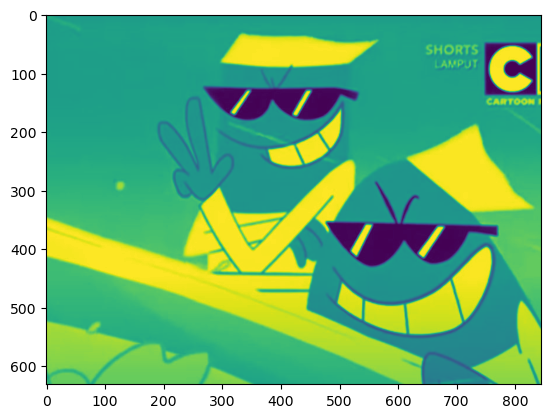

In [101]:
plt.imshow(image_data_averaged)

Now Scaling the image (by subtracting the mean and dividing the std)

In [102]:
image_data_scaled = (image_data_averaged - image_data_averaged.mean())/image_data_averaged.std()
image_data_scaled

array([[-0.4113, -0.4113, -0.4113, ..., -0.524 , -0.524 , -0.524 ],
       [-0.3223, -0.3223, -0.3223, ..., -0.524 , -0.524 , -0.524 ],
       [-0.2333, -0.2333, -0.2273, ..., -0.5062, -0.5062, -0.5062],
       ...,
       [ 0.455 ,  0.3838,  0.2414, ...,  0.2711,  0.6271,  0.7695],
       [ 0.4728,  0.4194,  0.277 , ...,  0.0931,  0.5203,  0.7339],
       [ 0.4906,  0.4372,  0.3126, ..., -0.0671,  0.4135,  0.7161]])

Now applying the SVD

In [103]:
U,S,Vt = np.linalg.svd(image_data_scaled)

In [110]:
S.shape , np.linalg.matrix_rank(image_data_averaged)

# it is rnak 631 matrix

((631,), 631)

*Lets Convert it to Rank n approximate matrix using **low-rank approximation***

In [49]:
n=25

In [50]:
S_la = np.pad(S[:n], (0, 631-n), 'constant', constant_values=(0,0))

In [51]:
sigma_la = np.pad(np.diag(S_la) , ((0,0),(0,845-631)) , 'constant' , constant_values=0)
sigma_la.shape

(631, 845)

In [52]:
new_image_data = np.dot(np.dot(U,sigma_la),Vt)

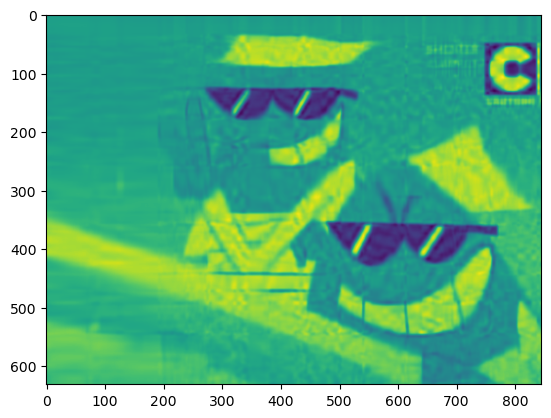

In [53]:
plt.imshow(new_image_data)